[-70.0, 0.05293248525724958, 0.3176769140606974, 0.5961207535084603]


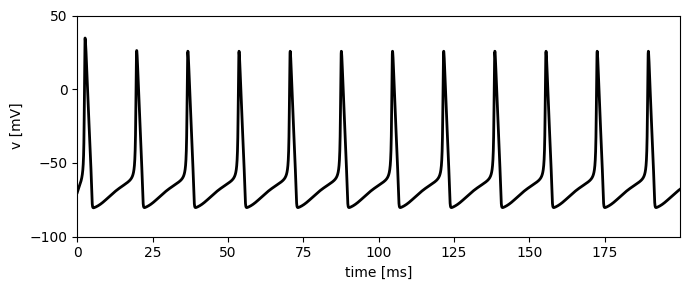

In [2]:
from scipy.integrate import odeint
import numpy as np
from numpy import exp
import pylab as pl


c = 1.0
g_k = 36.0
g_na = 120.0
g_l = 0.3
v_k = -82.0
v_na = 45.0
v_l = -59.0
i_ext = 7.0
t_final = 200.0
dt = 0.01


def beta_n(v):
    return 0.125 * exp(-(v + 70.0) / 80.0)


def beta_m(v):
    return 4.0 * exp(-(v + 70.0) / 18.0)


def beta_h(v):
    return 1. / (exp(-(v + 40.0) / 10.0) + 1.0)


def alpha_n(v):
    return 0.01 * (-60.0 - v) / (exp((-60.0 - v) / 10.0) - 1.0)


def alpha_m(v):
    if np.abs(v+45.0) > 1.0e-8:
        return (v + 45.0) / 10.0 / (1.0 - exp(-(v + 45.0) / 10.0))
    else:
        return 1.0


def alpha_h(v):
    return 0.07*exp(-(v+70)/20)


def h_inf(v):
    return alpha_h(v) / (alpha_h(v) + beta_h(v))


def m_inf(v):
    return alpha_m(v) / (alpha_m(v) + beta_m(v))


def n_inf(v):
    return alpha_n(v) / (alpha_n(v) + beta_n(v))


def derivative(x0, t):
    '''
    define HH Model
    '''
    v, m, n, h, = x0
    dv = (i_ext - g_na * h * m ** 3 * \
        (v - v_na) - g_k * n ** 4 * (v - v_k) - g_l * (v - v_l)) / c
    dm = alpha_m(v) * (1.0 - m) - beta_m(v) * m
    dn = alpha_n(v) * (1.0 - n) - beta_n(v) * n
    dh = alpha_h(v) * (1.0 - h) - beta_h(v) * h

    return [dv, dm, dn, dh]



v = -70.0
m = m_inf(v)
h = h_inf(v)
n = n_inf(v)
x0 = [v, m, n, h]

print(x0)

if __name__ == "__main__":

    t = np.arange(0, t_final, dt)
    sol = odeint(derivative, x0, t)
    v = sol[:, 0]

    pl.figure(figsize=(7, 3))
    pl.plot(t, v, lw=2, c="k")
    pl.xlim(min(t), max(t))
    pl.ylim(-100, 50)
    pl.xlabel("time [ms]")
    pl.ylabel("v [mV]")
    pl.yticks(range(-100, 100, 50))
    pl.tight_layout()
    pl.savefig("fig_1_3.png")
    # pl.show()

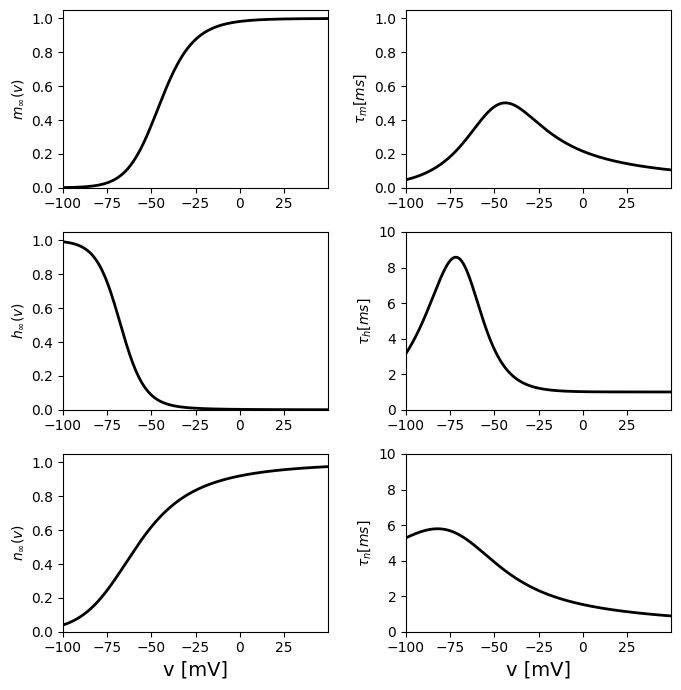

<Figure size 640x480 with 0 Axes>

In [3]:
from scipy.integrate import odeint
import numpy as np
from numpy import exp
import pylab as pl


c = 1.0
g_k = 36.0
g_na = 120.0
g_l = 0.3
v_k = -82.0
v_na = 45.0
v_l = -59.0
i_ext = 7.0
t_final = 200.0
dt = 0.01


def beta_n(v):
    return 0.125 * exp(-(v + 70.0) / 80.0)


def beta_m(v):
    return 4.0 * exp(-(v + 70.0) / 18.0)


def beta_h(v):
    return 1. / (exp(-(v + 40.0) / 10.0) + 1.0)


def alpha_n(v):
    return 0.01 * (-60.0 - v) / (exp((-60.0 - v) / 10.0) - 1.0)


def alpha_m(v):
    # if np.abs(v+45.0) > 1.0e-8:
        return (v + 45.0) / 10.0 / (1.0 - exp(-(v + 45.0) / 10.0))
    # else:
    #     return 1.0

# def alpha_m1(v):

#     r = np.zeros(len(v))

#     for i in range(len(v)):
#         if np.abs(v[i]+45.0) > 1.0e-8:
#             r[i] = (v[i] + 45.0) / 10.0 / (1.0 - exp(-(v[i] + 45.0) / 10.0))
#     else:
#         r[i] = 1.0
    
#     return r


def alpha_h(v):
    return 0.07*exp(-(v+70)/20)


def h_inf(v):
    return alpha_h(v) / (alpha_h(v) + beta_h(v))


def m_inf(v):
    return alpha_m(v) / (alpha_m(v) + beta_m(v))


def n_inf(v):
    return alpha_n(v) / (alpha_n(v) + beta_n(v))


def derivative(x0, t):

    v, m, n, h, = x0
    dv = (i_ext - g_na * h * m ** 3 * \
        (v - v_na) - g_k * n ** 4 * (v - v_k) - g_l * (v - v_l)) / c
    dm = alpha_m(v) * (1.0 - m) - beta_m(v) * m
    dn = alpha_n(v) * (1.0 - n) - beta_n(v) * n
    dh = alpha_h(v) * (1.0 - h) - beta_h(v) * h

    return [dv, dm, dn, dh]



v = -70.0
m = m_inf(v)
h = h_inf(v)
n = n_inf(v)
x0 = [v, m, n, h]

if __name__ == "__main__":


    fig, ax = pl.subplots(nrows=3, ncols=2, figsize=(7, 7))
    v = np.arange(-100, 50, 0.01)


    ax[0][0].plot(v, m_inf(v), lw=2, c="k")
    ax[1][0].plot(v, h_inf(v), lw=2, c="k")
    ax[2][0].plot(v, n_inf(v), lw=2, c="k")

    ax[0][1].plot(v, 1.0 / (alpha_m(v) + beta_m(v)), lw=2, c="k")
    # ax[0][1].plot(v, 1.0/(alpha_m1(v)+beta_m(v)), lw=2, c="r")

    ax[1][1].plot(v, 1.0/(alpha_h(v)+beta_h(v)), lw=2, c="k")
    ax[2][1].plot(v, 1.0/(alpha_n(v)+beta_n(v)), lw=2, c="k")

    ax[0][0].set_ylabel(r"$m_{\infty} (v)$")
    ax[1][0].set_ylabel(r"$h_{\infty} (v)$")
    ax[2][0].set_ylabel(r"$n_{\infty} (v)$")

    ax[0][1].set_ylabel(r"$\tau_m [ms]$")
    ax[1][1].set_ylabel(r"$\tau_h [ms]$")
    ax[2][1].set_ylabel(r"$\tau_n [ms]$")

    ax[2][0].set_xlabel("v [mV]", fontsize=14)
    ax[2][1].set_xlabel("v [mV]", fontsize=14)

    for i in range(3):
        for j in range(2):
            ax[i][j].set_xlim(min(v), max(v))
            ax[i][j].set_ylim([0, 1.05])
    ax[1][1].set_ylim([0, 10])
    ax[2][1].set_ylim([0, 10])
    
    
    pl.tight_layout()
    pl.show()
    pl.savefig("fig_3_1.png")
    # pl.show()